# Plotting Discrepancies for Kinetic Temperature

In [1]:
import numpy as np
import scipy.stats as sts
from scipy import constants as cnst
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
#fname = r"h:/appstateBulk/workAppstateBulk/postProcessing/20251025prjUncertPlotUncertainty/inputs/20251002aa_computeDiscrep04_forpap_100_500fps_corr/ptv_results.csv"

In [3]:
#fname = r"d:/kananovich/workAppstateBulk/postProcessing/20251015prjUncertPlotUncertainty/inputs/20251002aa_computeDiscrep04_forpap_100_500fps_corr/ptv_results.csv"

In [4]:
#fname = r"e:/appstateBulk/workAppstateBulk/HPCbackupHomeRsync/new/workHPC/prj_uncert_hpc/sims/ptv_results.csv"

In [5]:
#fname = "ptv_results.csv"

In [6]:
#fname = "ptv_results10eV.csv"

In [7]:
#fname = "ptv_results0d1eV.csv"

In [8]:
fname = "ptv_results01d0eV.csv"

In [9]:
arr_resol = np.arange(1E-6,40E-6,1.6E-7)
arr_framerate = np.arange(30.0, 500.0, 8.0)
arr_discrep_average = np.zeros((len(arr_resol), len(arr_framerate)))
number_of_averaging_iterations = 40
#levels_f_contour = np.array([0,1,3,5,10,20,30,40,50,100, 150,200])
levels_f_contour = np.array([5,10,20,30,40,50,100, 200,400,500,1000, 3000])
#levels_f_contour = np.array([0,10,20,40,80,100,200,500,1000,1500,2000,3000,10000,40000])

max_lev = np.max(levels_f_contour)

In [10]:
df = pd.read_csv(fname, index_col=0)

In [11]:
df.tail()

,2.000000000e+01,2.200000000e+01,2.400000000e+01,2.600000000e+01,2.800000000e+01,3.000000000e+01,3.200000000e+01,3.400000000e+01,3.600000000e+01,3.800000000e+01,...,4.860000000e+02,4.880000000e+02,4.900000000e+02,4.920000000e+02,4.940000000e+02,4.960000000e+02,4.980000000e+02,5.000000000e+02,5.020000000e+02,5.040000000e+02
resolution,,,,,,,,,,,,,,,,,,,,,
0.00004,0.010293,0.012220,0.014481,0.016195,0.018897,0.022691,0.024398,0.029106,0.033121,0.037880,...,16.718029,16.854122,16.993930,17.134247,17.278057,17.419103,17.560433,17.700822,17.845423,17.986518
0.00004,0.011416,0.012114,0.013418,0.017167,0.019182,0.021618,0.024934,0.029092,0.033366,0.037579,...,16.745951,16.894621,17.036598,17.166137,17.313596,17.448228,17.591431,17.738716,17.876801,18.020778
0.00004,0.011594,0.012385,0.013551,0.017047,0.019434,0.022097,0.025088,0.028469,0.033720,0.038219,...,16.787743,16.924501,17.061308,17.208025,17.346558,17.482339,17.630841,17.770893,17.919191,18.062314
0.00004,0.011239,0.012239,0.014369,0.016804,0.019301,0.023006,0.025650,0.028284,0.032784,0.038402,...,16.821866,16.960041,17.098927,17.236500,17.383417,17.524724,17.659620,17.808866,17.953343,18.096504
0.00004,0.010713,0.012284,0.014303,0.016120,0.019106,0.022565,0.025631,0.029234,0.033846,0.038549,...,16.853231,16.993166,17.136474,17.274151,17.417375,17.553215,17.700659,17.845774,17.986557,18.132647


In [12]:
frame_rates = df.columns.astype(float).to_numpy()
resolutions = df.index.to_numpy()
Z = df.to_numpy()
Z = Z * 100

<a list of 11 text.Text objects>

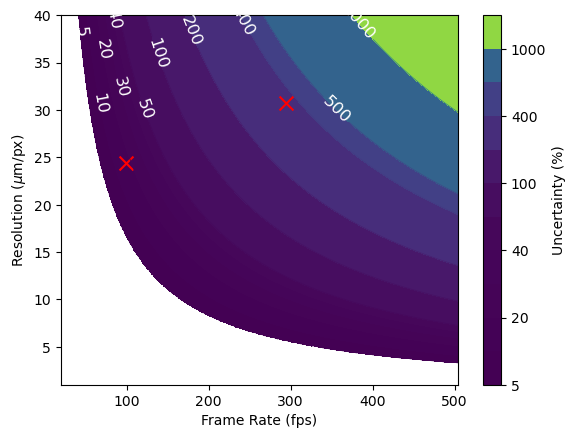

In [13]:
Xf, Yf = np.meshgrid(frame_rates, resolutions * 1000000)


# In[40]:


# Assuming X, Y, arr_discrep_average are already defined
fig5, ax5 = plt.subplots()

# Filled contours
khuj5 = ax5.contourf(Xf, Yf, Z, levels= levels_f_contour, norm=colors.Normalize(vmin=0, vmax=max_lev*0.8))

# Add colorbar with customized ticks
cbar5 = plt.colorbar(khuj5, ax=ax5, label='Uncertainty (%)')

# Axis labels
ax5.set_ylabel(r"Resolution ($\mu$m/px)")
ax5.set_xlabel(r"Frame Rate (fps)")

# Experimental points
ax5.scatter([99, 294], [24.39, 30.69], marker='x', color='red', label='Experimental points', s=100)

# Set colorbar limits to enforce end at 400
#cbar.ax.set_ylim(0, 400)

line_contours5 = ax5.contour(Xf, Yf, Z, levels=khuj5.levels, linewidths=0.5,norm=colors.Normalize(vmin=0, vmax=(max_lev*0.8)))

for txt in ax5.texts:
    txt.set_clip_on(True)

ax5.clabel(
    line_contours5,
    # khuj,
    fmt='%1.0f',
    fontsize=12,
    colors='white',
    inline=True,
    inline_spacing=2,
)

In [14]:
fig5.savefig("countour01d0eV.png")
fig5.savefig("countour01d0eV.eps")